In [1]:
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib

import numpy as np
import xarray as xr
import pandas as pd
from xgcm import Grid
import dask.array as da

import itertools
from collections import OrderedDict

import gridop as gop
from model import Model

In [2]:
from dask.distributed import Client, LocalCluster

# pour 1 seul noeud
# cluster = LocalCluster(n_workers=2, threads_per_worker=2)

# pour plusieurs noeuds:
# ** processes and cores may be adjusted in order to have more memory 
# or inversely more computational ressource
# attention, il faut sur datarmor: nb processes = nb cores
from dask_jobqueue import PBSCluster
cluster = PBSCluster(processes=1, cores=1, walltime='02:00:00')
w = cluster.scale(jobs=1)
cluster.adapt(minimum=1, maximum=5)

client = Client(cluster)
client

Client Scheduler: tcp://10.148.1.131:46179 Dashboard: http://10.148.1.131:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [3]:
# Initialisation gigatl3
# path = '/ccc/store/cont003/gen12051/gulaj/GIGATL3/GIGATL3_1h/'
path = '/home/datawork-lops-megatl/GIGATL3/GIGATL3_1h/'
run = 'moz_1024x1024x180_hmin30_r0p1_ts5_tb0_hc10_UP5_GLS_GEBCO2014/t1/'
filenames = [path + 'GIGATL3_12h_inst_2012-07-16-2012-07-20.nc']
gridname  = '/home/datawork-lops-megatl/GIGATL3/gigatl3_grid.nc'
longitude = -35.
latitude = 10.
depth = -10.
seldate = '2012-07-16'
slice='y'

# moz 1024
# path = '/home/datawork-lops-osi/cmenesg/moz/'
# run = 'moz_1024x1024x180_hmin30_r0p1_ts5_tb0_hc10_UP5_GLS_GEBCO2014/t1/'
# filenames = [path + run + 'his.nc']
# gridname  = path + run + 'grid.nc'
# seldate = '1901-07-11'
# longitude=40.

# moz 2000 
# path = '/home/datawork-lops-osi/cmenesg/moz/'
# run = 'moz_2000x2000x360_hmin30_r0p1_ts10_tb0_hc10_UP5_GLS_GEBCO2014/'
# tdir = 't1/'
# filenames = [path + run + 'zarr/his.zarr']
# gridname  = path + run + tdir + 'grid.nc'
# seldate = '1994-10-02'
# longitude=40.

In [4]:
croco = Model("croco_xios")

In [5]:
%%time
drop_variables = ['time', 'nav_lon_w', 'nav_lat_w',
                  'sustr', 'svstr','salt','temp','w','bvf',
                  'hc','h','Vtransform','sc_r','sc_w',
                  'Cs_r','Cs_w','angle','mask_rho',
                  'pm','pn','Tcline','theta_s','theta_b','f',
                  'lon_rho','lat_rho','lon_u','lat_u','lon_v','lat_v',
                  'nav_lon_rho','nav_lat_rho','nav_lon_u','nav_lat_u','nav_lon_v','nav_lat_v',
                  'time_instant','time_instant_bounds',
                  'time_counter_bounds',
                 ]
ds, grid = gop.open_files(croco, gridname, filenames, grid_metrics=1, drop_variables=drop_variables)

CPU times: user 2.2 s, sys: 1.48 s, total: 3.68 s
Wall time: 3.93 s


In [6]:
%%time
#croco.ds = auto_chunk(ds, keep_complete_dim='x', wanted_chunk=150)
croco.ds

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


<xarray.Dataset>
Dimensions:      (s: 100, s_w: 101, t: 10, x: 3002, x_u: 3001, y: 4002, y_v: 4001)
Coordinates:
  * s            (s) float32 -0.995 -0.985 -0.975 ... -0.025 -0.015 -0.005
  * s_w          (s_w) float32 -1.0 -0.99 -0.98 -0.97 ... -0.03 -0.02 -0.01 0.0
  * t            (t) datetime64[ns] 2012-07-16T12:00:00 ... 2012-07-21
    lat          (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    lon          (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    lon_u        (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    lat_u        (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    lon_v        (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    lat_v        (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    lon_f        (y_v, x_u) float32 dask.array<chunksize=(4001, 3001), meta=np.ndarray>
    lat_f        (y_v, x_u) float32 dask.array<chunksize=(4001, 3001), meta=np.ndarray>
Dimensions without coordinates: x, x_u, y, y_v
Data variables:
    z_sfc        (t, y, x) float32 dask.array<chunksize=(1, 4002, 3002), meta=np.ndarray>
    xcur_btrope  (t, y, x_u) float32 dask.array<chunksize=(1, 4002, 3001), meta=np.ndarray>
    ycur_btrope  (t, y_v, x) float32 dask.array<chunksize=(1, 4001, 3002), meta=np.ndarray>
    xcur         (t, s, y, x_u) float32 dask.array<chunksize=(1, 100, 4002, 3001), meta=np.ndarray>
    ycur         (t, s, y_v, x) float32 dask.array<chunksize=(1, 100, 4001, 3002), meta=np.ndarray>
    rho          (t, s, y, x) float32 dask.array<chunksize=(1, 100, 4002, 3002), meta=np.ndarray>
    hc           float32 300.0
    h            (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    pm           (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    pn           (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    sc_r         (s) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    sc_w         (s_w) float32 dask.array<chunksize=(101,), meta=np.ndarray>
    Cs_r         (s) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    Cs_w         (s_w) float32 dask.array<chunksize=(101,), meta=np.ndarray>
    angle        (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    mask         (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    dx           (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    dy           (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    dx_u         (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    dy_u         (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    dx_v         (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    dy_v         (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    dx_psi       (y_v, x_u) float32 dask.array<chunksize=(4001, 3001), meta=np.ndarray>
    dy_psi       (y_v, x_u) float32 dask.array<chunksize=(4001, 3001), meta=np.ndarray>
    rAr          (y_v, x_u) float32 dask.array<chunksize=(4001, 3001), meta=np.ndarray>
    rAu          (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    rAv          (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    rAf          (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
Attributes:
    name:           ./HIS/GIGATL3_12h_inst
    description:    Created by xios
    Conventions:    CF-1.6
    timeStamp:      2020-Mar-23 20:01:13 GMT
    uuid:           c2218514-a5e9-40af-ab90-2e812bec3d99
    title:          GIGATL3
    rst_file:       RST/gigatl3_r48_rst.0396.nc
    grd_file:       ./INIT/GRD/gigatl3_grd_masked.0396.nc
    ini_file:       RST/gigatl3_r47_rst.0396.nc
    frc_file:       ./INIT/FRC/gigatl3_frc_clim.0396.nc
    VertCoordType:  NEW
    theta_s:        5.0
    theta_s_expl:   S-coordinate surface cont

In [7]:
%%time
#ds1 = ds.sel(time_counter = np.datetime64(seldate), method = "nearest")
ds1 = croco.ds.sel(t = seldate, method = "nearest")
if slice=='x':
    ds1 = gop.auto_chunk(ds1, keep_complete_dim='x', wanted_chunk=150)
elif slice=='y':
    ds1 = gop.auto_chunk(ds1, keep_complete_dim='y', wanted_chunk=150)
elif slice=='z':
    ds1 = gop.auto_chunk(ds1, keep_complete_dim='s', wanted_chunk=150)
ds1

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 18.1 ms


<xarray.Dataset>
Dimensions:      (s: 100, s_w: 101, t: 1, x: 3002, x_u: 3001, y: 4002, y_v: 4001)
Coordinates:
  * s            (s) float32 -0.995 -0.985 -0.975 ... -0.025 -0.015 -0.005
  * s_w          (s_w) float32 -1.0 -0.99 -0.98 -0.97 ... -0.03 -0.02 -0.01 0.0
  * t            (t) datetime64[ns] 2012-07-16T12:00:00
    lat          (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    lon          (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    lon_u        (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    lat_u        (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    lon_v        (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    lat_v        (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    lon_f        (y_v, x_u) float32 dask.array<chunksize=(4001, 3001), meta=np.ndarray>
    lat_f        (y_v, x_u) float32 dask.array<chunksize=(4001, 3001), meta=np.ndarray>
Dimensions without coordinates: x, x_u, y, y_v
Data variables:
    z_sfc        (t, y, x) float32 dask.array<chunksize=(1, 4002, 3002), meta=np.ndarray>
    xcur_btrope  (t, y, x_u) float32 dask.array<chunksize=(1, 4002, 3001), meta=np.ndarray>
    ycur_btrope  (t, y_v, x) float32 dask.array<chunksize=(1, 4001, 3002), meta=np.ndarray>
    xcur         (t, s, y, x_u) float32 dask.array<chunksize=(1, 3, 4002, 3001), meta=np.ndarray>
    ycur         (t, s, y_v, x) float32 dask.array<chunksize=(1, 3, 4001, 3002), meta=np.ndarray>
    rho          (t, s, y, x) float32 dask.array<chunksize=(1, 3, 4002, 3002), meta=np.ndarray>
    hc           float32 300.0
    h            (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    pm           (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    pn           (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    sc_r         (s) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    sc_w         (s_w) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    Cs_r         (s) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    Cs_w         (s_w) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    angle        (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    mask         (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    dx           (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    dy           (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
    dx_u         (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    dy_u         (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    dx_v         (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    dy_v         (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    dx_psi       (y_v, x_u) float32 dask.array<chunksize=(4001, 3001), meta=np.ndarray>
    dy_psi       (y_v, x_u) float32 dask.array<chunksize=(4001, 3001), meta=np.ndarray>
    rAr          (y_v, x_u) float32 dask.array<chunksize=(4001, 3001), meta=np.ndarray>
    rAu          (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    rAv          (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    rAf          (y, x) float32 dask.array<chunksize=(4002, 3002), meta=np.ndarray>
Attributes:
    name:           ./HIS/GIGATL3_12h_inst
    description:    Created by xios
    Conventions:    CF-1.6
    timeStamp:      2020-Mar-23 20:01:13 GMT
    uuid:           c2218514-a5e9-40af-ab90-2e812bec3d99
    title:          GIGATL3
    rst_file:       RST/gigatl3_r48_rst.0396.nc
    grd_file:       ./INIT/GRD/gigatl3_grd_masked.0396.nc
    ini_file:       RST/gigatl3_r47_rst.0396.nc
    frc_file:       ./INIT/FRC/gigatl3_frc_clim.0396.nc
    VertCoordType:  NEW
    theta_s:        5.0
    theta_s_expl:   S-coordinate surface control parameter
    theta_b:    

In [8]:
toto = str(np.datetime64(ds1.t.isel(t=0).values, 'D'))
toto

'2012-07-16'

In [9]:
%%time
z_u = gop.get_z(croco, ds=ds1, z_sfc=ds1.z_sfc, xgrid=grid, hgrid='u')
z_u

CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 57 ms


<xarray.DataArray 'z_rho' (t: 1, s: 100, y: 4002, x_u: 3001)>
dask.array<where, shape=(1, 100, 4002, 3001), dtype=float32, chunksize=(1, 3, 4002, 3001), chunktype=numpy.ndarray>
Coordinates:
  * s        (s) float32 -0.995 -0.985 -0.975 -0.965 ... -0.025 -0.015 -0.005
    lon_u    (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
    lat_u    (y, x_u) float32 dask.array<chunksize=(4002, 3001), meta=np.ndarray>
  * t        (t) datetime64[ns] 2012-07-16T12:00:00
Dimensions without coordinates: y, x_u

In [10]:
%%time
if slice=='x':
    uslice= gop.slices(croco, ds1.xcur, z_u, ds=ds1, longitude=longitude).compute()
elif slice=='y':
    uslice= gop.slices(croco, ds1.xcur, z_u, ds=ds1, latitude=latitude).compute()
elif slice=='z':
    uslice= gop.slices(croco, ds1.xcur, z_u, ds=ds1, depth=depth).compute()
uslice

CPU times: user 1.24 s, sys: 380 ms, total: 1.62 s
Wall time: 1min 10s


<xarray.DataArray 'xcur' (s: 100, x_u: 3001)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * s        (s) float32 -0.995 -0.985 -0.975 -0.965 ... -0.025 -0.015 -0.005
    t        datetime64[ns] 2012-07-16T12:00:00
    lat_u    float64 10.0
    lon_u    (x_u) float64 -86.21 -86.17 -86.14 -86.11 ... 10.95 10.97 11.0
    z        (s, x_u) float64 -2.359e+03 -2.222e+03 ... -0.09376 -0.09376
Dimensions without coordinates: x_u

CPU times: user 80 ms, sys: 4 ms, total: 84 ms
Wall time: 125 ms


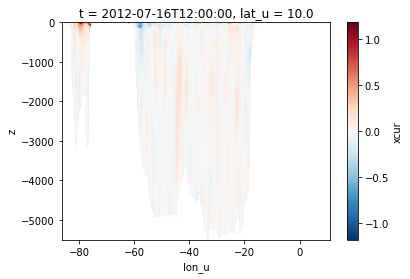

In [11]:
%%time
coords = gop.get_spatial_coords(uslice)
if slice=='x':
    uslice.plot(x=coords['lat'], y=coords['z'])
elif slice=='y':
    uslice.plot(x=coords['lon'], y=coords['z'])
elif slice=='z':
    uslice.plot(x=coords['lon'], y=coords['lat'])

In [12]:
%%time
# move slice of u at rho point
if slice=='y' or slice=='z':
    uslice = gop.x2rho(ds1, uslice, grid)

CPU times: user 4 ms, sys: 8 ms, total: 12 ms
Wall time: 12.4 ms


In [13]:
uslice

<xarray.DataArray (s: 100, x: 3002)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * s        (s) float32 -0.995 -0.985 -0.975 -0.965 ... -0.025 -0.015 -0.005
    lon      (x) float64 -86.21 -86.19 -86.16 -86.12 ... 10.93 10.96 10.98 11.0
    z        (s, x) float64 -2.359e+03 -2.291e+03 -2.1e+03 ... -0.09376 -0.09376
Dimensions without coordinates: x

In [14]:
%%time
z_v = gop.get_z(croco, ds=ds1, z_sfc=ds1.z_sfc, hgrid='v')
z_v

CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 57.3 ms


<xarray.DataArray 'z_rho' (t: 1, s: 100, y_v: 4001, x: 3002)>
dask.array<where, shape=(1, 100, 4001, 3002), dtype=float32, chunksize=(1, 3, 4001, 3002), chunktype=numpy.ndarray>
Coordinates:
  * s        (s) float32 -0.995 -0.985 -0.975 -0.965 ... -0.025 -0.015 -0.005
    lon_v    (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
    lat_v    (y_v, x) float32 dask.array<chunksize=(4001, 3002), meta=np.ndarray>
  * t        (t) datetime64[ns] 2012-07-16T12:00:00
Dimensions without coordinates: y_v, x

In [ ]:
%%time
if slice=='x':
    vslice= gop.slices(croco, ds1.ycur, z_v, ds=ds1, longitude=longitude).compute()
elif slice=='y':
    vslice= gop.slices(croco, ds1.ycur, z_v, ds=ds1, latitude=latitude).compute()
elif slice=='z':
    vslice= gop.slices(croco, ds1.ycur, z_v, ds=ds1, depth=depth).compute()

In [ ]:
vslice

In [ ]:
%%time
coords = gop.get_spatial_coords(vslice)
if slice=='x':
    vslice.plot(x=coords['lat'], y=coords['z'])
if slice=='y':
    vslice.plot(x=coords['lon'], y=coords['z'])
if slice=='z':
    vslice.plot(x=coords['lon'], y=coords['lat'])

In [ ]:
%%time
# move slice of v at rho point
if slice=='x' or slice=='z':
    vslice = gop.x2rho(ds1, vslice, grid)

In [ ]:
vslice

In [ ]:
%%time
z = gop.get_z(croco, ds=ds1, z_sfc=ds1.z_sfc, xgrid=grid, hgrid='r')
z

In [ ]:
%%time
# compute slice of angle
if slice=='x':
    aslice= gop.slices(croco, ds1.angle, z, ds=ds1, longitude=longitude).compute()
elif slice=='y':
    aslice= gop.slices(croco, ds1.angle, z, ds=ds1, latitude=latitude).compute()
elif slice=='z':
    aslice= ds1.angle.compute()

In [ ]:
%%time
# compute u_EW and v_NS
[urot,vrot] = gop.rotuv(croco, ds1, u=uslice, v=vslice, angle=aslice)

In [ ]:
%%time
coords = gop.get_spatial_coords(urot)
if slice=='x':
    urot.plot(x=coords['lat'], y=coords['z'])
elif slice=='y':
    urot.plot(x=coords['lon'], y=coords['z'])
elif slice=='z':
    urot.plot(x=coords['lon'], y=coords['lat'])

In [ ]:
cluster.close()